# Pilot Test Hybrid Product Recommendation Model (CFRCSB)

---

### Notebook Overview

- **Section 1 - Initialization and Setup**
  - Initializes necessary libraries and loads datasets for subsequent analysis.

- **Section 2 - Dataset Source & Description**
  - **Dataset Overview**
    - The project leverages the Sephora Products and Skincare Reviews dataset sourced from Kaggle. This dataset is pivotal for various analytical tasks such as trend analysis, sentiment analysis, and machine learning model development within the skincare product domain.

- **Section 3 - EDA & Data Preprocessing**
  - **Exploratory Data Analysis (EDA)**
    - Provides a comprehensive overview of the dataset's structure, featuring key attributes and statistical insights extracted from `review_df` and `product_info_clustered_df`.
  - **Data Cleaning and Handling Missing Values**
    - Details the rigorous process of handling missing data entries, ensuring data integrity and completeness prior to analysis.
  - **Feature Extraction and Normalization**
    - Discusses the extraction and normalization of features essential for segmentation and deeper analysis of skincare products.

- **Section 4 - Sentiment Analysis of Review Comments**
  - **Sentiment Analysis Preparation**
    - Introduces the setup for sentiment analysis using the VADER lexicon, which aids in understanding the sentiment expressed in user reviews.
  - **Calculating Sentiment Scores**
    - Implements a function to compute sentiment scores for each review comment, crucial for subsequent sentiment-based recommendations.

- **Section 5 - Model Training**
  - **Data Preparation and Model Training**
    - Splits the dataset into training and testing sets, constructs item-user matrices, and applies collaborative filtering techniques using ratings, sentiment scores, and clustering information.
  - **Item-Item Similarity Calculation**
    - Computes cosine similarity matrices based on various factors (`ratings`, `sentiment scores`, `cluster factors`) to establish product similarities essential for accurate recommendation systems this is the novelty part in this research.

- **Section 5.1 - Prediction Function Definition**
  - **Collaborative Filtering Prediction**
    - Defines a function to predict ratings using collaborative filtering techniques, allowing for personalized product recommendations based on user behavior and preferences.

- **Section 6 - Model Testing and Evaluation**
  - **Testing Predictive Models**
    - Evaluates model performance across different collaborative filtering algorithms (`Traditional`, `CFRBS`, `CFRBCS`) using metrics like RMSE, MAE, MAPE, and MSLE.
  - **Performance Visualization**
    - Visualizes and compares the effectiveness of each model in predicting user ratings, providing insights into their relative strengths and weaknesses.

- **Section 7 - Hyperparameter Tunning**
  - **Optimal distribution of weights**
    - Evaluates model performance across different combinations of weights for `alpha`,`beta` and `gama`.
  - **Optimal number of Similar products (S)**
    - Visualizes and compares the MAE values for different values of S.

- **Section 8 - Results and Discussion**
  - **Experiment Results Summary**
    - Summarizes the outcomes of the model evaluations, highlighting the superior performance of the CFRBCS algorithm in predicting ratings and its implications for skincare product recommendations.

- **Section 9 - CFRCSB Product Recommendation Algorithm**
  - **Recommendation Function Definition**
    - Defines a function that recommends similar skincare products to users based on their interaction history and the combined collaborative filtering approach (CFRCSB).

This structured approach ensures thorough exploration, analysis, and implementation of advanced techniques to derive actionable insights and enhance user experience in skincare product recommendations.

---

## SECTION 1 - Initialization and Setup

This section involves loading all necessary libraries and datasets into the environment. This includes importing required Python packages for data processing, analysis, visualization, or machine learning. Additionally, datasets will be read in for subsequent analysis steps. Proper loading and initialization of these resources ensures smooth execution of the project's subsequent steps.

In [2]:
# Import statements 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Normalization 
from sklearn.preprocessing import StandardScaler

# Testing
from sklearn.metrics import mean_squared_error

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.preprocessing import MinMaxScaler

# Model training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error


---

## SECTION 2 - Dataset Source & Description

The [Sephora Products and Skincare Reviews dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews) available on Kaggle provides a comprehensive collection of data related to skincare products available at Sephora, a prominent retailer in the beauty industry. This dataset is invaluable for exploring trends in skincare products, analyzing customer sentiments, or developing machine learning models for product recommendation or sentiment analysis tasks.

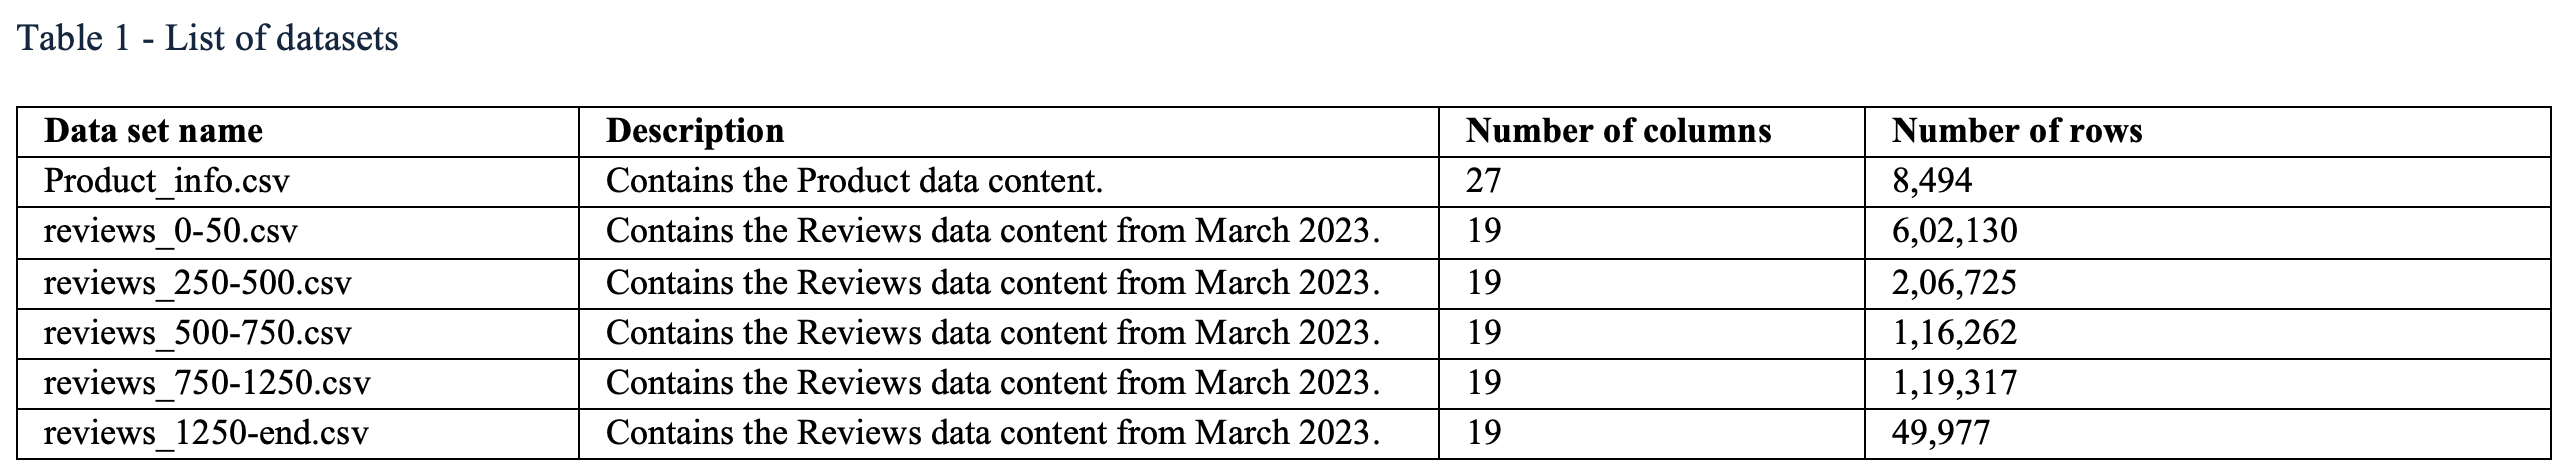

#### Key Features of the Dataset:

- **Products Information**: Detailed attributes of skincare products such as brand, category, price, and ingredients.
- **Customer Reviews**: Sentiment analysis data including ratings, reviews, and user demographics.
- **Brand Diversity**: Covers a wide range of brands available at Sephora, offering insights into brand popularity and customer preferences.

#### Data Sources:

The dataset is compiled from publicly available customer reviews and product information from Sephora's online platform. It is structured to facilitate easy analysis and extraction of insights regarding product performance, customer preferences, and sentiment towards skincare products.


In [3]:
# Define the file paths

# Make sure to download the files to the local machine and use the local path for the review infomation.
# Make sure to change the `review_path_n` variable path according to your local machine.  

# Product info data, along with cluster factor information
# The `product_info_clusterd_path` should be the same path as mentioned in EDA_Stage1.ipynb file. 
# This path leads to `product_info_clustered_df` df which is crutial for this research. 
product_info_clusterd_path = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/product_info_clustered.csv'
review_path_1 = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/reviews_0-250.csv'
review_path_2 = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/reviews_250-500.csv'
review_path_3 = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/reviews_500-750.csv'
review_path_4 = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/reviews_750-1250.csv'

# Read into df
product_info_clustered_df = pd.read_csv(product_info_clusterd_path)
review_df_1 = pd.read_csv(review_path_1)
review_df_2 = pd.read_csv(review_path_2)
review_df_3 = pd.read_csv(review_path_3)
review_df_4 = pd.read_csv(review_path_4)

review_df = pd.concat([review_df_1, review_df_2, review_df_3, review_df_4], ignore_index=True)

print("Shape of products df " + str(product_info_clustered_df.shape) + " Shape of reviews df " + str(review_df.shape))

Shape of products df (8216, 7) Shape of reviews df (1044434, 19)


---

## SECTION 3 - EDA & Data Preprocessing

#### Summary of Dataset

- The dataset `review_df` contains information about 1,044,434 reviews across 19 attributes. Here are some key insights:
- The dataset `product_info_clustered_df` contains information about 8,216 products across 7 attributes. Here are some key insights:

##### Structure review_df

- `review_df` comprises 1,044,434 entries with 19 columns.
- Data types include `object` (11 columns), `float64` (3 columns), and `int64` (5 columns).

##### Structure product_info_clustered_df

- `product_info_clustered_df` comprises 8,216 entries with 7 columns.
- Data types include `object` (1 column), `float64` (5 columns), and `int64` (1 column).

##### Attributes review_df

- **Review Information**: `author_id`, `rating`, `is_recommended`, `helpfulness`, `total_feedback_count`, `total_neg_feedback_count`, `total_pos_feedback_count`, `submission_time`, `review_text`, `review_title`.
- **User Information**: `skin_tone`, `eye_color`, `skin_type`, `hair_color`.
- **Product Information**: `product_id`, `product_name`, `brand_name`, `price_usd`.

##### Attributes product_info_clustered_df

- **Product Information**: `product_id`, `price_usd`, `rating`, `reviews`, `loves_count`.
- **Cluster Information**: `cluster`, `cluster_factor`.

##### Statistics review_df

- **Numerical Summary**:
  - `rating` ranges from 1 to 5 with a mean of 2.073.

- **Categorical Insights**:
  - The dataset contains 383,697 unique authors.
  - `submission_time` covers a wide range of dates with 5,317 unique values.
  - The most frequent `skin_tone` is "light" with 141,402 occurrences.
  - The most common `eye_color` is "brown" with 243,751 occurrences.
  - The most frequent `skin_type` is "combination" with 292,308 occurrences.
  - The most common `hair_color` is "brown" with 218,139 occurrences.
  - The most reviewed product is "Lip Sleeping Mask Intense Hydration with Vitamin C" (P420652) with 16,138 reviews.
  - The most frequent brand is Tatcha with 40,681 reviews.

##### Statistics product_info_clustered_df

- **Numerical Summary**:
  - `price_usd` ranges from approximately \$-0.903 to \$34.62 (standardized data).
  - `rating` ranges from approximately -6.18 to 1.56 (standardized data).
  - `reviews` ranges from approximately -0.406 to 18.91 (standardized data).
  - `loves_count` ranges from approximately -0.45 to 20.47 (standardized data).
  - `cluster` ranges from 0 to 4 with a mean of 2.35.
  - `cluster_factor` ranges from 0.013 to 1.000 with a mean of 0.092.

- **Categorical Insights**:
  - The dataset contains 8,216 unique products.

In [6]:
# # Understand the data structure
print(review_df.info())
print(review_df.describe())
print(review_df.describe(include='object'))

# # Understand the data structure
print(product_info_clustered_df.info())
print(product_info_clustered_df.describe())
print(product_info_clustered_df.describe(include='object'))

         Unnamed: 0        rating  is_recommended    helpfulness  \
count  1.044434e+06  1.044434e+06   880263.000000  496297.000000   
mean   2.073123e+05  4.303296e+00        0.841359       0.767792   
std    1.748092e+05  1.143601e+00        0.365341       0.318644   
min    0.000000e+00  1.000000e+00        0.000000       0.000000   
25%    6.527700e+04  4.000000e+00        1.000000       0.652174   
50%    1.433185e+05  5.000000e+00        1.000000       0.933333   
75%    3.410208e+05  5.000000e+00        1.000000       1.000000   
max    6.021290e+05  5.000000e+00        1.000000       1.000000   

       total_feedback_count  total_neg_feedback_count  \
count          1.044434e+06              1.044434e+06   
mean           3.979309e+00              8.450060e-01   
std            2.276262e+01              5.062652e+00   
min            0.000000e+00              0.000000e+00   
25%            0.000000e+00              0.000000e+00   
50%            0.000000e+00              0.00

### Data Cleaning and Handling Missing Values

#### Dropping unnecessary columns

The first columns in the `review_df` is unnecessary and can be removed to obtain a cleaner dataframe. 

#### Checking for Null Values

Before proceeding with any analysis or modeling, it's crucial to first assess the quality of the data. One significant aspect of data quality is handling missing values. In the dataset, a thorough examination identified columns with missing data points.

Upon inspection, several columns exhibited varying degrees of missing values. Notably, attributes such as `skin_type`, `skin_tone`, `helpfullness`, and `hair_colour` showed significant percentages of missing data. 

#### Handling Missing Values

In the process of data cleaning, the primary strategy was to ensure data completeness, especially for critical attributes that directly impact the analysis. For instance, since the `review_text` column serves as a fundamental indicator of product review, rows with missing `review_text` values were excluded.

By selectively dropping rows with missing `review_text` values, the aim was to mitigate potential biases that could arise from incomplete data. This approach aligns with best practices in data preprocessing, where prioritizing complete datasets fosters more accurate and robust analytical outcomes.

In [420]:
# Drop first column in review_df as it is not requried
review_df = review_df.drop(review_df.columns[0], axis=1)
print("Shape of products df " + str(product_info_clustered_df.shape) + " Shape of reviews df " + str(review_df.shape))

Shape of products df (8216, 7) Shape of reviews df (1044434, 18)


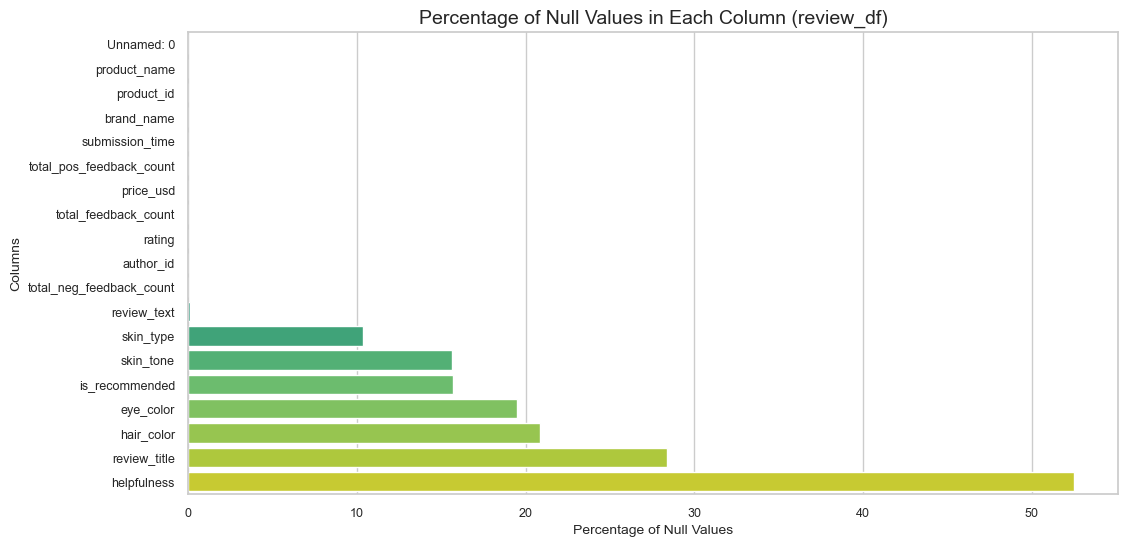


Missing values in Review Dataframe:
Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              164156
helpfulness                 547135
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                      0
review_title                294880
skin_tone                   163291
eye_color                   203295
skin_type                   107886
hair_color                  217857
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64


In [7]:
# Calculate the percentage of null values for each column
null_percentage_review = review_df.isnull().mean() * 100

# Sort the percentages for better visualization
null_percentage_review_sorted = null_percentage_review.sort_values()

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(null_percentage_review_sorted))

sns.barplot(x=null_percentage_review_sorted, y=null_percentage_review_sorted.index, palette=palette)
plt.xlabel('Percentage of Null Values', fontsize=10)
plt.ylabel('Columns', fontsize=10)
plt.title('Percentage of Null Values in Each Column (review_df)', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

# Drop the rows where review_text is not present
review_df.dropna(subset=['review_text'], inplace=True)

# Drop rows where author_id length is greater than 10 or less than 9
review_df = review_df[~(review_df['author_id'].str.len().gt(11) | review_df['author_id'].str.len().lt(6))]

# Check for missing values in review_df after dropping
print("\nMissing values in Review Dataframe:")
print(review_df.isnull().sum())

In [8]:
# Check for missing values in review_df after dropping
print("\nMissing values in product_info_clustered_df Dataframe:")
print(product_info_clustered_df.isnull().sum())


Missing values in product_info_clustered_df Dataframe:
product_id        0
price_usd         0
rating            0
reviews           0
loves_count       0
cluster           0
cluster_factor    0
dtype: int64


#### Analysis of Author ID Lengths

This analysis on the length of `author_id` in the `review_df` DataFrame is requried because of the presence of junk entires in this column.

1. **Identify Invalid Author IDs**
   - Filters and counts the number of `author_id`s with lengths greater than 10 or less than 9.

2. **Clean the DataFrame**
   - Drops rows where `author_id` length is greater than 11 or less than 6.

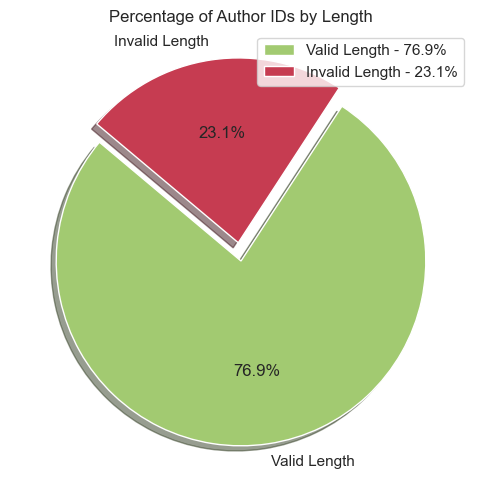

Shape of reviews df (1042992, 19)


In [9]:
# Calculate the total number of author IDs
total_count = review_df['author_id'].count()

# Calculate the number of author IDs with lengths greater than 10 or less than 9
invalid_count = review_df[(review_df['author_id'].str.len().gt(10) | review_df['author_id'].str.len().lt(9))].count()[0]

# Compute the percentage
invalid_percentage = (invalid_count / total_count) * 100
valid_percentage = 100 - invalid_percentage

# Data for visualization
labels = ['Valid Length', 'Invalid Length']
sizes = [valid_percentage, invalid_percentage]
colors = ['#A2CA71', '#C63C51']
explode = (0, 0.1)  # explode the 2nd slice

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Author IDs by Length')
plt.legend(loc='upper right', labels=['{} - {:1.1f}%'.format(l, s) for l, s in zip(labels, sizes)])  # Adding legend with percentages
plt.show()

# Drop rows where author_id length is greater than 10 or less than 9
review_df = review_df[~(review_df['author_id'].str.len().gt(11) | review_df['author_id'].str.len().lt(6))]

print("Shape of reviews df " + str(review_df.shape))

#### Features needed for Item-based Collaborative Filtering

Item-based collaborative filtering in this analysis is based on the ratings various authors have given the different products. The following columns from the `review_df` dataset (`author_id`, `product_id`, `rating`, `review_text`) will be utilized as features:

   - **Item-based Collaborative Filtering Features:** 
     - `author_id`: Author Id.
     - `product_id`: Product Id. 
     - `rating`: Rating provided to the product by the author.

   - **Sentiment Feature:** 
     - `review_text`: Review provided to the product by the author. 

In [10]:
# Select the desired features
selected_columns = ['author_id', 'product_id', 'rating', 'review_text']
filtered_review_df = review_df[selected_columns]

filtered_review_df.head(1)

,author_id,product_id,rating,review_text
0,1741593524,P504322,5,I use this with the Nudestix “Citrus Clean Bal...


#### Merge the dataframes

The dataframes will be merged based on `product_id` so that the cluster information is available along with the review information for each product.

In [11]:
# Merge filtered_review_df with product_info_clustered on 'product_id'
product_cluster_sentiment_analysis_df = pd.merge(filtered_review_df, product_info_clustered_df[['product_id', 'cluster_factor']], on='product_id', how='left')

print("Shape of product_cluster_sentiment_analysis_df df " + str(product_cluster_sentiment_analysis_df.shape))

# Check for null values in product_cluster_sentiment_analysis_df
null_counts = product_cluster_sentiment_analysis_df.isnull().sum()

print("Null value counts:")
print(null_counts)

Shape of product_cluster_sentiment_analysis_df df (1042992, 5)
Null value counts:
author_id         0
product_id        0
rating            0
review_text       0
cluster_factor    0
dtype: int64


---

## SECTION 4 - Sentiment Analysis of review comments

This section conducts sentiment analysis on user comments associated with products. Sentiment analysis aids in understanding the overall sentiment (positive, negative, or neutral) expressed in reviews, which is crucial for calculating item similarities during model training.

### Steps:

1. **Download the VADER Lexicon:**
   The VADER lexicon, specialized for sentiment analysis in social media and reviews, is downloaded for use in this analysis.

2. **Initialize the VADER Sentiment Analyzer:**
   The VADER sentiment analyzer is initialized to evaluate sentiment in each user comment.

3. **Define a Function for Sentiment Score Calculation:**
   A function, `get_sentiment_score`, is defined to calculate the sentiment score of each user comment using the 'compound' score from VADER.

4. **Apply the Function to the Review Text Column:**
   The `get_sentiment_score` function is applied to the `review_text` column of the dataframe, adding a `sentiment_score` column with sentiment scores for each comment.

5. **Normalize the Sentiment Score:**
   Sentiment scores are normalized using `MinMaxScaler` to ensure consistency across a 0-1 range, facilitating further analysis.


These normalized sentiment scores will be used to compute similarities between items in subsequent model training, enhancing the accuracy and relevance of recommendations derived from the analysis.

In [12]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the review_text column
product_cluster_sentiment_analysis_df['sentiment_score'] = product_cluster_sentiment_analysis_df['review_text'].apply(get_sentiment_score)

# Normalize the sentiment score
scaler = MinMaxScaler()
product_cluster_sentiment_analysis_df['normalized_sentiment_score'] = scaler.fit_transform(product_cluster_sentiment_analysis_df[['sentiment_score']])

# Display the dataframe with the new normalized_sentiment_score column
product_cluster_sentiment_analysis_df.head(1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mukundhsrikanth/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,author_id,product_id,rating,review_text,cluster_factor,sentiment_score,normalized_sentiment_score
0,1741593524,P504322,5,I use this with the Nudestix “Citrus Clean Bal...,0.013,0.9392,0.969604


In [14]:
# Reduce the product_cluster_sentiment_analysis_df to 50% in size for better perfromance
reduced_product_cluster_sentiment_analysis_df = product_cluster_sentiment_analysis_df.sample(frac=0.5, random_state=1)

# Check the new shape
print(reduced_product_cluster_sentiment_analysis_df.shape)

(521496, 7)


---

## SECTION 5 - Model Training

### Splitting the Data into Training and Testing Sets

This section involves splitting the dataset into training and testing sets. The steps include:

1. **Splitting the Data:**
   - The dataset (`reduced_product_cluster_sentiment_analysis_df`) is split into training 80% and testing sets 20%.
   - `train_test_split` is used with a test size of 20% and a random state of 42 to ensure reproducibility.

In [15]:
# Split the data into train and test sets
train_data, test_data = train_test_split(reduced_product_cluster_sentiment_analysis_df, test_size=0.2, random_state=42)

print("train_data shape : ",train_data.shape)
print("test_data shape",test_data.shape)

train_data shape :  (417196, 7)
test_data shape (104300, 7)


#### Creating Item-User Matrices for Training and Testing Data

This section involves creating item-user matrices for both the training and testing datasets based on different features. The process includes:

1. **Creating Item-User Matrices:**
   - For each feature (`rating`, `normalized_sentiment_score`, `cluster_factor`), item-user matrices are created where:
     - Rows represent `product_id`.
     - Columns represent `author_id`.
   - The `pivot_table` function is used to pivot the data, filling missing values with 0.


In [18]:
# Create item-user matrices for training data
train_item_user_rating_matrix = train_data.pivot_table(index='product_id', columns='author_id', values='rating').fillna(0)
train_item_user_sentiment_matrix = train_data.pivot_table(index='product_id', columns='author_id', values='normalized_sentiment_score').fillna(0)
train_item_user_cluster_matrix = train_data.pivot_table(index='product_id', columns='author_id', values='cluster_factor').fillna(0)

# Create item-user matrices for testing data
test_item_user_rating_matrix = test_data.pivot_table(index='product_id', columns='author_id', values='rating').fillna(0)
test_item_user_sentiment_matrix = test_data.pivot_table(index='product_id', columns='author_id', values='normalized_sentiment_score').fillna(0)
test_item_user_cluster_matrix = test_data.pivot_table(index='product_id', columns='author_id', values='cluster_factor').fillna(0)

# Print shapes of the matrices
print("Training Rating Matrix Shape:", train_item_user_rating_matrix.shape)
print("Testing Rating Matrix Shape:", test_item_user_rating_matrix.shape)
print("Training Sentiment Matrix Shape:", train_item_user_sentiment_matrix.shape)
print("Testing Sentiment Matrix Shape:", test_item_user_sentiment_matrix.shape)
print("Training Cluster Matrix Shape:", train_item_user_cluster_matrix.shape)
print("Testing Cluster Matrix Shape:", test_item_user_cluster_matrix.shape)

Training Rating Matrix Shape: (1247, 290381)
Testing Rating Matrix Shape: (1246, 90681)
Training Sentiment Matrix Shape: (1247, 290381)
Testing Sentiment Matrix Shape: (1246, 90681)
Training Cluster Matrix Shape: (1247, 290381)
Testing Cluster Matrix Shape: (1246, 90681)


#### Filtering the Item-User Matrices

This section involves filtering the item-user matrices for the `author_ids` who have rated at least 4 products. This step is essential as the hybrid product recommendation model will provide predicted ratings considering the two or more most similar products the same user has rated or provided comments for.

1. **Counting Non-Zero records:**
   - A boolean DataFrame is created where ratings or sentiment scores greater than 0 are marked as True, and others as False.
   - These True values are summed along the columns (axis=0) to get the count of non-zero ratings or sentiment scores for each `author_id`.

2. **Filtering Author IDs Based on the Count:**
   - `author_ids` with fewer than 4 non-zero ratings or sentiment scores are filtered out.

3. **Retaining Only the Filtered Columns:**
   - Using the filtered `author_ids`, only the columns corresponding to these `author_ids` are selected and retained in the original matrix.

4. **Displaying the Shapes of the Filtered Matrices:**
   - The dimensions of the filtered Matrices (number of rows and columns) are printed to verify the filtering.

In [19]:
# Step 1: Count the non-zero ratings for each author_id
non_zero_counts = (train_item_user_rating_matrix > 0).sum()

# Step 2: Filter author_ids based on the count
filtered_author_ids = non_zero_counts[non_zero_counts >= 4].index

# Step 3: Retain only the filtered columns in the DataFrame
filtered_train_item_user_rating_matrix = train_item_user_rating_matrix[filtered_author_ids]

# Display the filtered DataFrame
print(filtered_train_item_user_rating_matrix.shape)

(1247, 10897)


In [20]:
# Step 1: Count the non-zero ratings for each author_id
non_zero_counts = (train_item_user_sentiment_matrix > 0).sum()

# Step 2: Filter author_ids based on the count
filtered_author_ids = non_zero_counts[non_zero_counts >= 4].index

# Step 3: Retain only the filtered columns in the DataFrame
filtered_train_item_user_sentiment_matrix = train_item_user_sentiment_matrix[filtered_author_ids]

# Display the filtered DataFrame
print(filtered_train_item_user_sentiment_matrix.shape)

(1247, 10897)


In [21]:
# Step 1: Count the non-zero ratings for each author_id
non_zero_counts = (test_item_user_rating_matrix > 0).sum()

# Step 2: Filter author_ids based on the count
filtered_author_ids = non_zero_counts[non_zero_counts >= 4].index

# Step 3: Retain only the filtered columns in the DataFrame
filtered_test_item_user_rating_matrix = test_item_user_rating_matrix[filtered_author_ids]

print(filtered_test_item_user_rating_matrix.shape)


(1246, 919)


#### Calculating Item-Item Similarity Matrix (Cosine Similarity) (Ratings)

This section involves calculating the item-item similarity matrix using cosine similarity and converting it to a DataFrame. The steps include:

1. **Calculating Cosine Similarity:**
   - Using the `cosine_similarity` function from `sklearn.metrics.pairwise`, the cosine similarity matrix is computed based on `filtered_train_item_user_rating_matrix`.
   - This matrix measures the similarity between items (products) based on their user ratings.

2. **Converting to DataFrame:**
   - The computed cosine similarity matrix is converted into a pandas DataFrame (`cosine_rating_item_similarities_df`).

In [22]:
# Calculate item-item similarity matrix (cosine similarity)
item_rating_similarities = cosine_similarity(filtered_train_item_user_rating_matrix) 

# Convert to DataFrame
cosine_rating_item_similarities_df = pd.DataFrame(item_rating_similarities, index=filtered_train_item_user_rating_matrix.index, columns=filtered_train_item_user_rating_matrix.index)

print(cosine_rating_item_similarities_df)

product_id   P107306  P114902    P12045   P122651  P122661   P122718  \
product_id                                                             
P107306     1.000000  0.00000  0.000000  0.000000      0.0  0.000000   
P114902     0.000000  1.00000  0.029730  0.000000      0.0  0.000000   
P12045      0.000000  0.02973  1.000000  0.019922      0.0  0.021817   
P122651     0.000000  0.00000  0.019922  1.000000      0.0  0.000000   
P122661     0.000000  0.00000  0.000000  0.000000      1.0  0.207968   
...              ...      ...       ...       ...      ...       ...   
P94421      0.000000  0.00000  0.000000  0.000000      0.0  0.000000   
P94812      0.126601  0.00000  0.012936  0.000000      0.0  0.000000   
P9939       0.072513  0.00000  0.000000  0.000000      0.0  0.000000   
P9940       0.072373  0.00000  0.019966  0.000000      0.0  0.005718   
P9941       0.070502  0.00000  0.000000  0.047682      0.0  0.000000   

product_id   P122727   P122762   P122767   P122774  ...    P545

#### Calculating Item-Item Similarity Matrix (Cosine Similarity based on Sentiment Scores)

This section involves calculating the item-item similarity matrix using cosine similarity based on normalized sentiment scores and converting it to a DataFrame. The steps include:

1. **Calculating Cosine Similarity:**
   - Utilizing the `cosine_similarity` function from `sklearn.metrics.pairwise`, the cosine similarity matrix is computed based on `filtered_train_item_user_sentiment_matrix`.
   - This matrix measures the similarity between items (products) based on their sentiment scores.

2. **Converting to DataFrame:**
   - The computed cosine similarity matrix is converted into a pandas DataFrame (`cosine_sentiment_item_similarities_df`).

In [23]:
# Calculate item-item similarity matrix (cosine similarity)
item_sentiment_similarities = cosine_similarity(filtered_train_item_user_sentiment_matrix) 

# Convert to DataFrame
cosine_sentiment_item_similarities_df = pd.DataFrame(item_sentiment_similarities, index=filtered_train_item_user_sentiment_matrix.index, columns=filtered_train_item_user_sentiment_matrix.index)

print(cosine_sentiment_item_similarities_df)

product_id   P107306   P114902    P12045   P122651  P122661   P122718  \
product_id                                                              
P107306     1.000000  0.000000  0.000000  0.000000      0.0  0.000000   
P114902     0.000000  1.000000  0.036416  0.000000      0.0  0.000000   
P12045      0.000000  0.036416  1.000000  0.018990      0.0  0.018102   
P122651     0.000000  0.000000  0.018990  1.000000      0.0  0.000000   
P122661     0.000000  0.000000  0.000000  0.000000      1.0  0.218116   
...              ...       ...       ...       ...      ...       ...   
P94421      0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
P94812      0.140513  0.000000  0.010755  0.000000      0.0  0.000000   
P9939       0.097112  0.000000  0.000000  0.000000      0.0  0.000000   
P9940       0.087254  0.000000  0.019629  0.000000      0.0  0.014084   
P9941       0.094490  0.000000  0.000000  0.081357      0.0  0.000000   

product_id   P122727   P122762   P122767   P122774

#### Calculating Item-Item Similarity Matrix (Cosine Similarity based on Cluster Factors)

This section involves calculating the item-item similarity matrix using cosine similarity based on cluster factors and converting it to a DataFrame. The steps include:

1. **Calculating Cosine Similarity:**
   - Using the `cosine_similarity` function from `sklearn.metrics.pairwise`, the cosine similarity matrix is computed based on `train_item_user_cluster_matrix`.
   - This matrix measures the similarity between items (products) based on their cluster factors.

2. **Converting to DataFrame:**
   - The computed cosine similarity matrix is converted into a pandas DataFrame (`cosine_cluster_item_similarities_df`).

In [24]:
# Calculate item-item similarity matrix (cosine similarity)
item_sentiment_similarities = cosine_similarity(train_item_user_cluster_matrix) 

# Convert to DataFrame
cosine_cluster_item_similarities_df = pd.DataFrame(item_sentiment_similarities, index=train_item_user_cluster_matrix.index, columns=train_item_user_cluster_matrix.index)

print(cosine_cluster_item_similarities_df)

product_id   P107306   P114902    P12045   P122651   P122661   P122718  \
product_id                                                               
P107306     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P114902     0.000000  1.000000  0.003198  0.000000  0.002399  0.003730   
P12045      0.000000  0.003198  1.000000  0.004196  0.000000  0.001786   
P122651     0.000000  0.000000  0.004196  1.000000  0.000000  0.004894   
P122661     0.000000  0.002399  0.000000  0.000000  1.000000  0.026803   
...              ...       ...       ...       ...       ...       ...   
P94421      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P94812      0.014544  0.000000  0.002832  0.000000  0.004249  0.003303   
P9939       0.009903  0.000000  0.003856  0.000000  0.000000  0.000000   
P9940       0.010464  0.000000  0.006112  0.000000  0.000000  0.002376   
P9941       0.015991  0.000000  0.003113  0.008529  0.000000  0.000000   

product_id   P122727   P122762   P122

#### Combining Similarity Matrices with Weighted Approach - CFRBS Algorithml by Jian Zhen Yu et al. (2018).

This section involves combining the ratins and sentiment similarity matrices using a weighted average approach with a parameters `alpha`. The steps include:

1. **Defining the Combination Function:**
   - A Python function `combine_similarity_matrices` is defined to combine two similarity matrices (`similarity_ratings` and `similarity_sentiment`) using a weighted average.
   - The combined similarity matrix `combined_similarity` is calculated as `alpha * similarity_ratings + (1 - alpha) * similarity_sentiment`.

2. **Combining Similarities:**
   - Using the defined function `combine_similarity_matrices`, the two cosine similarity matrices (`cosine_rating_item_similarities_df` and `cosine_sentiment_item_similarities_df`) are combined with a value for `alpha`.
   - The `alpha` parameter can be adjusted as needed to control the influence of each similarity matrix in the combined result.

In [25]:
def combine_similarity_matrices(similarity_ratings, similarity_sentiment, alpha):
    combined_similarity = alpha * similarity_ratings + (1 - alpha) * similarity_sentiment
    return combined_similarity

In [26]:
# As per the study done by Jian Zhen Yu et al. (2018) the optimal value for `alpha` is 0.4
combined_similarity = combine_similarity_matrices(cosine_rating_item_similarities_df, cosine_sentiment_item_similarities_df, alpha=0.4)

# Output
print("Combined Similarity Matrix:")
print(combined_similarity)

Combined Similarity Matrix:
product_id   P107306   P114902    P12045   P122651  P122661   P122718  \
product_id                                                              
P107306     1.000000  0.000000  0.000000  0.000000      0.0  0.000000   
P114902     0.000000  1.000000  0.033742  0.000000      0.0  0.000000   
P12045      0.000000  0.033742  1.000000  0.019363      0.0  0.019588   
P122651     0.000000  0.000000  0.019363  1.000000      0.0  0.000000   
P122661     0.000000  0.000000  0.000000  0.000000      1.0  0.214057   
...              ...       ...       ...       ...      ...       ...   
P94421      0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
P94812      0.134948  0.000000  0.011627  0.000000      0.0  0.000000   
P9939       0.087272  0.000000  0.000000  0.000000      0.0  0.000000   
P9940       0.081301  0.000000  0.019764  0.000000      0.0  0.010737   
P9941       0.084895  0.000000  0.000000  0.067887      0.0  0.000000   

product_id   P122727  

#### Combining Similarity Matrices with Weighted Approach - CFRBCS Algorithm

This section involves combining three similarity matrices (rating, sentiment, and clustering) using weighted coefficients (`alpha`,`beta` and `gama`). The steps include:

1. **Defining the Combination Function:**
   - A Python function `combine_similarity_matrices_cluster` is defined to combine three similarity matrices (`similarity_ratings`, `similarity_sentiment`, and `cluster_sentiment`) using weighted coefficients.
   - The combined similarity matrix `combined_similarity_with_cluster` is calculated as:
  
  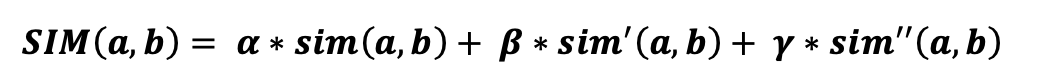

2. **Combining Similarities:**
   - Using the defined function `combine_similarity_matrices_cluster`, the three cosine similarity matrices (`cosine_rating_item_similarities_df`, `cosine_sentiment_item_similarities_df`, and `cosine_cluster_item_similarities_df`) are combined with specified `alpha`,`beta` and `gama` values (e.g., alpha=0.4, beta=0.3, gama=0.3).


In [27]:
def combine_similarity_matrices_cluster(similarity_ratings, similarity_sentiment, cluster_sentiment, alpha, beta, gama):
    combined_similarity_with_clustering = alpha * similarity_ratings + beta * similarity_sentiment + gama * cluster_sentiment
    return combined_similarity_with_clustering

In [33]:
combined_similarity_with_cluster = combine_similarity_matrices_cluster(cosine_rating_item_similarities_df, cosine_sentiment_item_similarities_df, cosine_cluster_item_similarities_df, alpha=0.3, beta = 0.1, gama=0.6)

# Output
print("Combined Similarity Matrix:")
print(combined_similarity_with_cluster)

Combined Similarity Matrix:
product_id   P107306   P114902    P12045   P122651   P122661   P122718  \
product_id                                                               
P107306     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P114902     0.000000  1.000000  0.014479  0.000000  0.001440  0.002238   
P12045      0.000000  0.014479  1.000000  0.010393  0.000000  0.009427   
P122651     0.000000  0.000000  0.010393  1.000000  0.000000  0.002936   
P122661     0.000000  0.001440  0.000000  0.000000  1.000000  0.100284   
...              ...       ...       ...       ...       ...       ...   
P94421      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P94812      0.060758  0.000000  0.006655  0.000000  0.002549  0.001982   
P9939       0.037407  0.000000  0.002314  0.000000  0.000000  0.000000   
P9940       0.036716  0.000000  0.011620  0.000000  0.000000  0.004549   
P9941       0.040194  0.000000  0.001868  0.027558  0.000000  0.000000   

product_i

---

## SECTION 5.1 - Prediction Function Definition

#### Predicting Ratings 

This section focuses on predicting ratings for a target user and product using collaborative filtering based on cosine similarity. Depending on the cosine similarity matrix passed as an argument, various algorithms (Traditional, CFRBS, CFRBCS) can be employed to predict the rating:

1. **Defining the Prediction Function:**
   - The function `predicted_rating` is defined to predict the Collaborative Filtering-based Rating Score (CFRSB) for a given target user (`target_author_id`) and product (`target_product_id`).
   - Parameters include:
     - `target_author_id`: ID of the target user.
     - `target_product_id`: ID of the target product.
     - `item_user_matrix`: Matrix where rows represent products and columns represent users
     - `cosine_similarity_matrix`: Matrix representing cosine similarity between products.
     - `K`: Number of similar products to consider in the prediction.

2. **Calculating Predictions:**
   - Extract the ratings provided by the `target_author_id` from `item_user_matrix`.
   - Find products (`rated_product_ids`) rated by the `target_author_id` (where ratings > 0).
   - Calculate cosine similarity scores (`similarity_score`) between `target_product_id` and `rated_product_ids`.
   - Identify the top K similar products (`top_K_similar_products`) based on similarity scores.
   - Fetch ratings (`target_user_ratings_K_products`) of these K similar products by the `target_author_id`.
   - Compute the predicted rating using the weighted average formula:
     ```
     prediction = (sum(similarity_score * target_user_ratings_K_products)) / sum(similarity_score)
     ```
     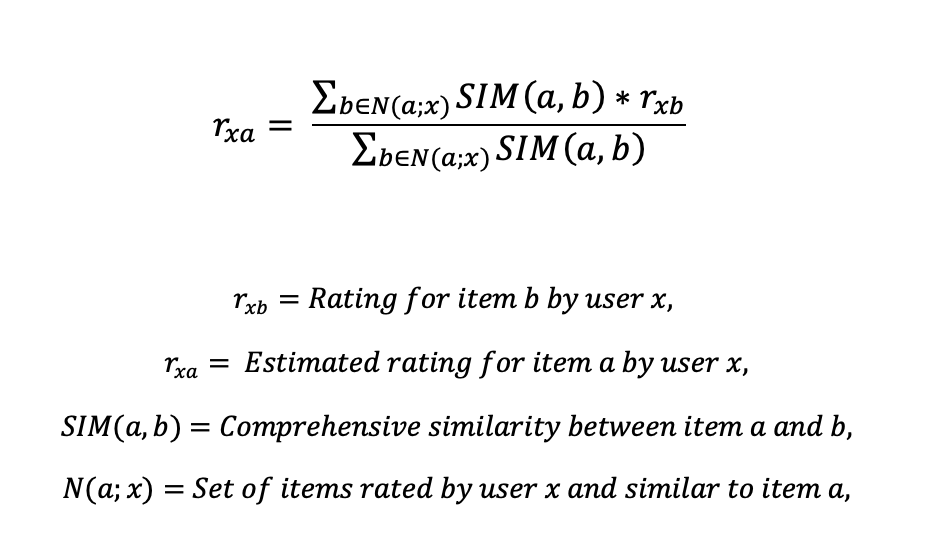

3. **Handling Edge Cases:**
   - If `top_K_similar_products.sum()` equals 0 (indicating no similar products), the function returns a default prediction (typically 0).

4. **Returning the Prediction:**
   - The function returns the predicted rating (`prediction`) for the target user and product pair.

In [29]:
def predicted_rating(target_author_id, target_product_id, item_user_matrix, cosine_similarity_matrix, K):
    """
    Predict the CFRSB score for each users and product 

    Parameters:
    - target_author_id: ID of the target user
    - target_product_id: ID of the target product
    - item_user_matrix: The matrix containing user ratings for products
    - cosine_similarity_matrix: The matrix containing cosine similarity scores between products
    - K: Number of similar products to consider
    """

    # Initialize prediction variable
    prediction = 0

    # Extract the ratings provided by the target_author_id
    user_ratings = item_user_matrix.loc[:, target_author_id]
    # print("user_ratings",user_ratings)

    # Find the indices (product_ids) where the rating is greater than 0
    rated_product_ids = user_ratings[user_ratings > 0].index
    # print("rated_product_ids",rated_product_ids)

    # Check the similarity of these products with the target_product_id 
    similarity_score = cosine_similarity_matrix.loc[target_product_id, rated_product_ids]
    # print("similarity_score",similarity_score)

    # Fetch the top K similar products
    top_K_similar_products = similarity_score.nlargest(K)
    # print("top_K_similar_products",top_K_similar_products)
    
    # Get the rating for target_author_id's ratings for these K products 
    target_user_ratings_K_products = item_user_matrix.loc[top_K_similar_products.index, target_author_id]
    # print("target_user_ratings_K_products",target_user_ratings_K_products)
    
    if top_K_similar_products.sum() == 0:
        return prediction

    # Calculate predicted rating using weighted average
    numerator = (top_K_similar_products * target_user_ratings_K_products).sum()
    denominator = top_K_similar_products.sum()

    prediction = numerator / denominator
    # print("prediction",prediction)

    return prediction

---

## SECTION 6 - Model Testing

#### Testing the Models with all Algorithms

This section involves testing the predictive models using three algorithms: Traditional Collaborative Filtering and Collaborative Filtering with Sentiment Analysis (CFRSB) and Collaborative Filtering with Clustering and Sentiment Analysis (CFRCSB).

1. **Setup:**
   - Three new DataFrames (`traditional_prediction_df`, `CFRBS_prediction_df`, `CFRBCB_prediction_df`) are created with the same index and columns as `filtered_test_item_user_rating_matrix`.

2. **Prediction Loop:**
   - For each `target_product_id` in `filtered_test_item_user_rating_matrix`:
     - Retrieve the `author_ids` (`target_author_id`) for which the rating is not 0 (`author_actual_ratings`).
   
3. **Predictions:**
   - For each `(target_author_id, rating)` pair in `author_actual_ratings`:
     - **Traditional Collaborative Filtering:**
       - Call the `predicted_rating` function to predict the traditional rating using `cosine_rating_item_similarities_df`.
       - Store the prediction in `traditional_prediction_df`.
     
     - **CFRBS (Combined Collaborative Filtering with Ratings and Sentiment):**
       - Call the `predicted_rating` function to predict the CFRBS rating using `combined_similarity`.
       - Store the prediction in `CFRBS_prediction_df`.
     
     - **CFRBCS (Combined Collaborative Filtering with Ratings, Sentiment, and Clusters):**
       - Call the `predicted_rating` function to predict the CFRCSB rating using `combined_similarity_with_cluster`.
       - Store the prediction in `CFRBCS_prediction_df`.

4. **Handling Missing Values:**
   - Fill any missing values in the prediction DataFrames (`traditional_prediction_df`, `CFRBS_prediction_df`, `CFRBCS_prediction_df`) with 0 to ensure completeness.


In [34]:
# Test the model with all the algorithms 

# Create new DataFrames with the same index and columns
traditional_prediction_df = pd.DataFrame(index=filtered_test_item_user_rating_matrix.index, columns=filtered_test_item_user_rating_matrix.columns)
CFRBS_prediction_df = pd.DataFrame(index=filtered_test_item_user_rating_matrix.index, columns=filtered_test_item_user_rating_matrix.columns)
CFRBCS_prediction_df = pd.DataFrame(index=filtered_test_item_user_rating_matrix.index, columns=filtered_test_item_user_rating_matrix.columns)

for target_product_id, row in filtered_test_item_user_rating_matrix.iterrows():
    
    # Get the author_ids for which the rating is not 0
    author_actual_ratings = [(target_author_id, rating) for target_author_id, rating in row.items() if rating != 0]

    if len(author_actual_ratings) > 0:

        for index, (target_author_id, placeholder) in enumerate(author_actual_ratings):
            
            # Call the prediction function to predict the traditional rating
            traditional_prediction = predicted_rating(target_author_id, target_product_id, 
                                                      filtered_test_item_user_rating_matrix, 
                                                      cosine_rating_item_similarities_df, 
                                                      2)
            
            traditional_prediction_df.loc[target_product_id, target_author_id] = traditional_prediction
            traditional_prediction_df = traditional_prediction_df.fillna(0)

            # Call the prediction function to predict the CFRBS rating
            CFRBS_prediction = predicted_rating(target_author_id, target_product_id, 
                                                filtered_test_item_user_rating_matrix, 
                                                combined_similarity, 
                                                2)
            
            CFRBS_prediction_df.loc[target_product_id, target_author_id] = CFRBS_prediction
            CFRBS_prediction_df = CFRBS_prediction_df.fillna(0)

            # Call the prediction function to predict the CFRCBS rating
            CFRBCB_prediction = predicted_rating(target_author_id, target_product_id, 
                                                 filtered_test_item_user_rating_matrix, 
                                                 combined_similarity_with_cluster, 
                                                 2)
            
            CFRBCS_prediction_df.loc[target_product_id, target_author_id] = CFRBCB_prediction
            CFRBCS_prediction_df = CFRBCS_prediction_df.fillna(0)

# Output
print(traditional_prediction_df.shape)
print(CFRBS_prediction_df.shape)
print(CFRBCS_prediction_df.shape)

(1246, 919)
(1246, 919)
(1246, 919)


#### Evaluating and Visualizing Model Performance

This section evaluates the performance of different collaborative filtering models (`Traditional`, `CFRBS`, `CFRBCS`) using various evaluation metrics and visualizes the results.

1. **Evaluation Function (`evaluate_model`):**
   - Define a function to compute evaluation metrics such as RMSE, MAE, MAPE, and MSLE between true (`y_true`) and predicted (`y_pred`) ratings.

2. **Convert DataFrames to Numpy Arrays:**
   - Convert predicted ratings (`traditional_predicted_ratings`, `CFRBS_predicted_ratings`, `CFRBCS_predicted_ratings`) and actual ratings (`actual_ratings`) from DataFrames to numpy arrays for evaluation.

3. **Evaluate Models:**
   - Calculate evaluation metrics (`RMSE`, `MAE`, `MAPE`, `MSLE`) for each model (`Traditional`, `CFRBS`, `CFRBCS`) by comparing `y_true` with `y_traditional_pred`, `y_CFRBS_pred`, and `y_CFRBCS_pred`, respectively.

4. **Store Metrics in a DataFrame (`metrics_df`):**
   - Create a DataFrame to store the computed evaluation metrics (`RMSE`, `MAE`, `MAPE`, `MSLE`) for each model (`Traditional`, `CFRBS`, `CFRBCS`).

5. **Print Metrics Table:**
   - Display the metrics DataFrame (`metrics_df`) to compare the performance of each model across different evaluation metrics.

6. **Visualize Metrics:**
   - Use seaborn to display the comparison of evaluation metrics (`RMSE`, `MAE`, `MAPE`, `MSLE`) for each model (`Traditional`, `CFRBS`, `CFRBCS`).
   - Each subplot illustrates how well each model performs based on the respective metric, providing a visual comparison of their effectiveness.

metrics_df         Method      RMSE       MAE      MAPE          MSLE
0  Traditional  0.007792  0.000113  0.000034  6.654540e-06
1        CFRBS  0.007765  0.000113  0.000034  6.629374e-06
2       CFRBCS  0.003097  0.000074  0.000023  5.562494e-07


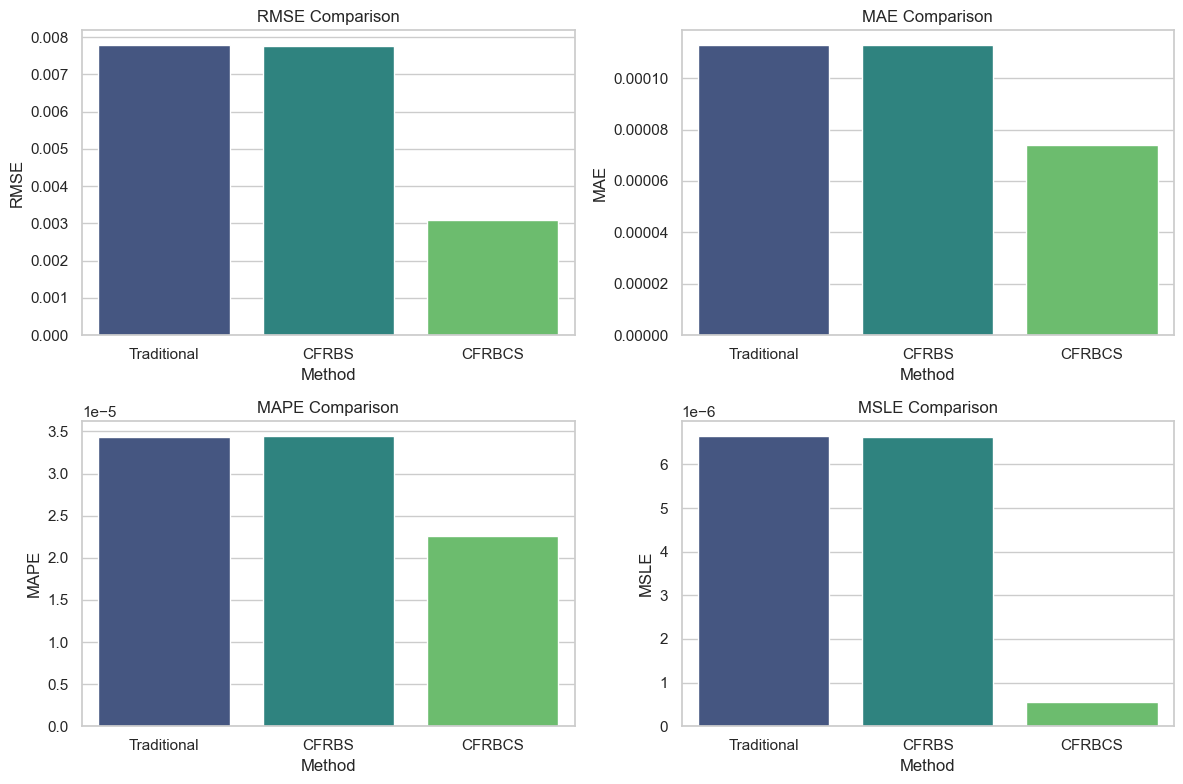

In [35]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    return rmse, mae, mape, msle

# Convert DataFrames to numpy arrays
actual_ratings = filtered_test_item_user_rating_matrix.values
traditional_predicted_ratings = traditional_prediction_df.values
CFRBS_predicted_ratings = CFRBS_prediction_df.values
CFRBCS_predicted_ratings = CFRBCS_prediction_df.values

# Extract actual and predicted ratings
y_true = actual_ratings
y_traditional_pred = traditional_predicted_ratings
y_CFRBS_pred = CFRBS_predicted_ratings
y_CFRBCS_pred = CFRBCS_predicted_ratings

# Evaluate the models
metrics_traditional = evaluate_model(actual_ratings, traditional_predicted_ratings)
metrics_CFRBS = evaluate_model(actual_ratings, CFRBS_predicted_ratings)
metrics_CFRBCS = evaluate_model(actual_ratings, CFRBCS_predicted_ratings)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Method': ['Traditional', 'CFRBS', 'CFRBCS'],
    'RMSE': [metrics_traditional[0], metrics_CFRBS[0], metrics_CFRBCS[0]],
    'MAE': [metrics_traditional[1], metrics_CFRBS[1], metrics_CFRBCS[1]],
    'MAPE': [metrics_traditional[2], metrics_CFRBS[2], metrics_CFRBCS[2]],
    'MSLE': [metrics_traditional[3], metrics_CFRBS[3], metrics_CFRBCS[3]]
})

print("metrics_df",metrics_df)
# Plot the metrics using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(2, 2, 1)
sns.barplot(x='Method', y='RMSE', data=metrics_df, palette='viridis')
plt.title('RMSE Comparison')

# MAE
plt.subplot(2, 2, 2)
sns.barplot(x='Method', y='MAE', data=metrics_df, palette='viridis')
plt.title('MAE Comparison')

# MAPE
plt.subplot(2, 2, 3)
sns.barplot(x='Method', y='MAPE', data=metrics_df, palette='viridis')
plt.title('MAPE Comparison')

# MSLE
plt.subplot(2, 2, 4)
sns.barplot(x='Method', y='MSLE', data=metrics_df, palette='viridis')
plt.title('MSLE Comparison')

plt.tight_layout()
plt.show()

---

## SECTION 7 - Hyperparameter Tunning

#### Optimal combination of model weights `alpha`, `beta` and `gama`

This section involves visualising the various combinations of the weights and corresponding RMSE value. 
The `data` df is populated with the combination of weights and their corresponding RMSL values. 

This data was obtained by iteratively changing the weights in model traning and testing section. As per this flow diagram

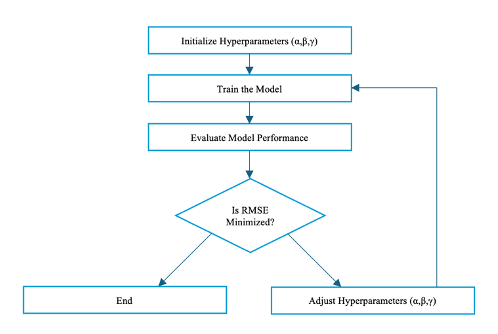

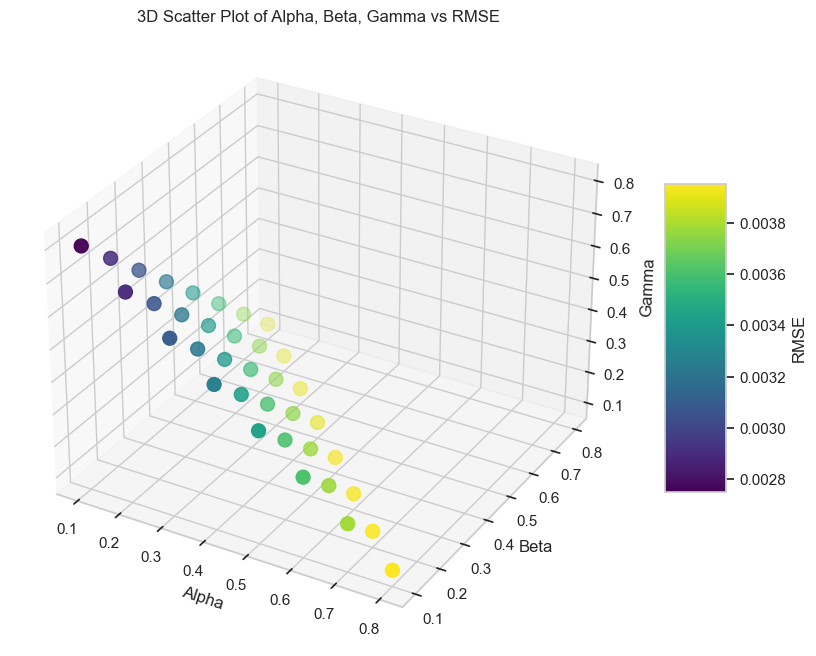

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create the dataframe
data = {
    'Alpha': [0.8, 0.7, 0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Beta': [0.1, 0.1, 0.2, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'Gamma': [0.1, 0.2, 0.1, 0.3, 0.2, 0.1, 0.4, 0.3, 0.2, 0.1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    'RMSE': [0.003951, 0.003784, 0.003943, 0.003611, 0.003776, 0.003937, 0.003441, 0.003606, 0.003775, 0.00393, 0.00326, 0.00343, 0.00360, 0.00374, 0.00390, 0.00310, 0.00323, 0.00340, 0.00357, 0.00374, 0.00391, 0.00290, 0.00306, 0.00323, 0.00339, 0.00357, 0.00374, 0.00390, 0.00275, 0.00290, 0.00306, 0.00322, 0.00339, 0.00356, 0.00374, 0.00390]
}

df = pd.DataFrame(data)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Alpha'], df['Beta'], df['Gamma'], c=df['RMSE'], cmap='viridis', s=100)

ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Gamma')

# Adding a color bar to show RMSE values
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('RMSE')

plt.title('3D Scatter Plot of Alpha, Beta, Gamma vs RMSE')
plt.show()

Similarly, the below graph shows the MAE noted for each S, where S is the number of similar products. (`alpha`=0.3,`beta`=0.1`gama`=0.6)

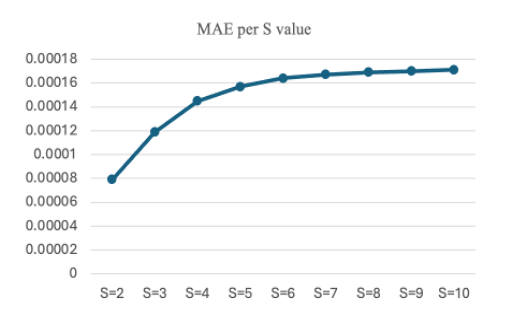

---

## SECTION 8 - Results and Discussion


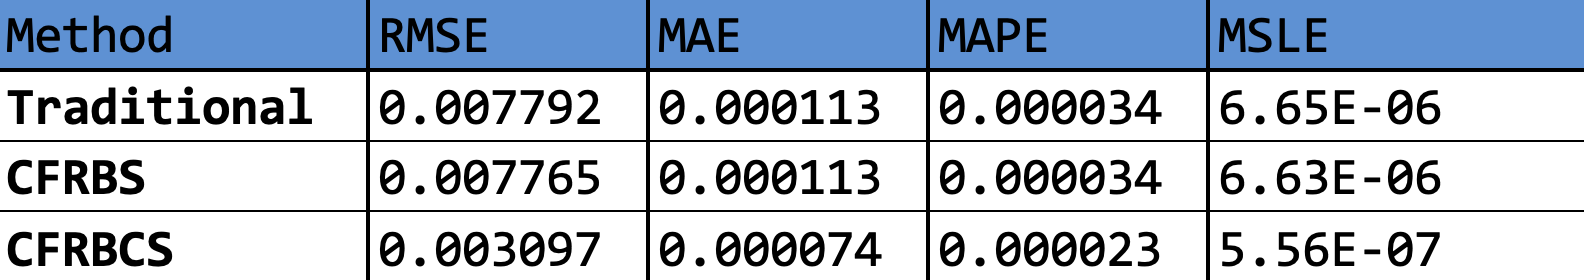

#### Experiment Results Summary

The experiment evaluated three methods: Traditional, CFRBS, and CFRBCS, using RMSE, MAE, MAPE, and MSLE metrics. CFRBCS demonstrated superior performance with the lowest values across all metrics: RMSE (0.003097), MAE (0.000074), MAPE (0.000023), and MSLE (5.56e-7). These results indicate that CFRBCS provides more accurate predictions compared to both Traditional and CFRBS methods, highlighting its effectiveness for product recommendations. 

---

## SECTION 9 - CFRCSB product recommendation algorithm


#### Purpose:
The `recommend_similar_products` function recommends similar products to a given target product for a specified user, based on their interactions (ratings) and the CFRCSB algorithm.

### Parameters:
- **target_author_id**: ID of the target user for whom recommendations are being made.
- **item_user_matrix**: Matrix where rows represent products and columns represent users.
- **cosine_similarity_matrix**: Matrix containing precomputed cosine similarity scores between products.
- **S**: Number of similar products to consider for each prediction.
- **N**: Number of top products to recommend.

### Steps:
1. **Extract User Ratings**:
   - Extracts ratings given by `target_author_id` from `item_user_matrix`.

2. **Identify Rated Products**:
   - Finds products that `target_author_id` has rated (where the rating is greater than 0).

3. **Compute Similarity Scores**:
   - Computes cosine similarity scores between `target_product_id` and the products rated by `target_author_id`.

4. **Sort and Exclude Target Product**:
   - Sorts the computed similarity scores in descending order.
   - Excludes `target_product_id` from the sorted list (if it exists).

5. **Select Top S Similar Products**:
   - Selects the top S similar products based on similarity scores, excluding `target_product_id`.

6. **Return Recommendations**:
   - Returns a list of IDs of the top N products.

### Output:
The function returns a list of product IDs (`recommended_products`) that are most similar to `target_product_id`, based on the user's ratings and precomputed similarity scores.

In [36]:
# Make predictions and then generate top N products that can be recommendaed 

def recommend_top_n_products(target_author_id, item_user_matrix, cosine_similarity_matrix, S, N):
    """
    Recommend the top N products for a target user based on predicted ratings.

    Parameters:
    - target_author_id: ID of the target user
    - item_user_matrix: The matrix containing user ratings for products
    - cosine_similarity_matrix: The matrix containing cosine similarity scores between products
    - S: Number of similar products to consider for each prediction
    - N: Number of top products to recommend

    Returns:
    - A DataFrame with the top N recommended products and their predicted ratings
    """

    # List to store product IDs and their predicted ratings
    product_predictions = []

    # Get all product IDs from the item_user_matrix
    all_product_ids = item_user_matrix.index

    # Iterate over all products to predict ratings
    for product_id in all_product_ids:
            predicted_rating_value = predicted_rating(
                target_author_id, 
                product_id, 
                item_user_matrix, 
                cosine_similarity_matrix, 
                S
            )
            product_predictions.append((product_id, predicted_rating_value))

    # Convert to DataFrame for easier manipulation
    predictions_df = pd.DataFrame(product_predictions, columns=['Product_ID', 'Predicted_Rating'])

    # Filter out any predictions that are zero or less (not predicted to be rated)
    predictions_df = predictions_df[predictions_df['Predicted_Rating'] > 0]

    # Sort the DataFrame by predicted rating in descending order
    predictions_df = predictions_df.sort_values(by='Predicted_Rating', ascending=False)

    # Get the top N recommendations
    top_n_recommendations = predictions_df.head(N)

    return top_n_recommendations

In [38]:
target_user_id = '1696370280'

# Call the function to get the top N recommended products
top_recommendations = recommend_top_n_products(
    target_author_id=target_author_id, 
    item_user_matrix=filtered_test_item_user_rating_matrix, 
    cosine_similarity_matrix=combined_similarity_with_cluster, 
    S=2, 
    N=10
)

# Display the recommendations
print("Top Recommended Products:")
print(top_recommendations)

Top Recommended Products:
     Product_ID  Predicted_Rating
653     P456566               5.0
93      P377533               5.0
321     P427415               5.0
1044    P481739               5.0
398     P435386               5.0
405     P436891               5.0
311     P427397               5.0
597     P454794               5.0
78      P309308               5.0
417     P439926               5.0
